In [51]:
path = 'results/cifar10_rere_lrp_final_cifar10'

In [52]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stdout-2025-01-13-18-48.txt',
 'args-2025-01-13-22-55.txt',
 'args-2025-01-14-07-22.txt',
 'stdout-2025-01-13-22-55.txt',
 'raw_log-2025-01-14-05-03.txt',
 'args-2025-01-14-00-59.txt',
 'args-2025-01-13-20-51.txt',
 'raw_log-2025-01-13-18-48.txt',
 'stdout-2025-01-13-16-41.txt',
 'stderr-2025-01-13-20-51.txt',
 'args-2025-01-13-14-38.txt',
 'raw_log-2025-01-13-20-51.txt',
 'stderr-2025-01-13-18-48.txt',
 'stderr-2025-01-14-03-01.txt',
 'stdout-2025-01-14-07-22.txt',
 'raw_log-2025-01-14-07-22.txt',
 'stdout-2025-01-13-14-38.txt',
 'stdout-2025-01-14-03-01.txt',
 'stdout-2025-01-14-00-59.txt',
 'stderr-2025-01-13-14-38.txt',
 'args-2025-01-13-16-41.txt',
 'stderr-2025-01-14-00-59.txt',
 'stdout-2025-01-13-20-51.txt',
 'raw_log-2025-01-13-22-55.txt',
 'args-2025-01-13-18-48.txt',
 'args-2025-01-14-03-01.txt',
 'raw_log-2025-01-13-14-38.txt',
 'stdout-2025-01-14-05-03.txt',
 'raw_log-2025-01-14-00-59.txt',
 'stderr-2025-01-13-22-55.txt',
 'args-2025-01-14-05-03.txt',
 'raw_log-2025-01-1

In [53]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-13-22-55.txt',
 'args-2025-01-14-07-22.txt',
 'args-2025-01-14-00-59.txt',
 'args-2025-01-13-20-51.txt',
 'args-2025-01-13-14-38.txt',
 'args-2025-01-13-16-41.txt',
 'args-2025-01-13-18-48.txt',
 'args-2025-01-14-03-01.txt',
 'args-2025-01-14-05-03.txt']

In [54]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-13-22-55.txt': {'acc_drop': 5.0,
  'approach': 'rere_lrp',
  'batch_size': 512,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['cifar10'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'final_cifar10',
  'feature_selection_mean': True,
  'features_saved': 40,
  'fix_bn': False,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.05,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'vgg11',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 153,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositories/FACIL/re

In [55]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-14-05-03.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 0.686612347126007},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 56.8},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 0.01},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 0.6797044324874878},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 66.7},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-14-05-03',
   'value': 0.01},
  {'group

In [56]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [57]:
import pandas as pd
from itertools import chain
import numpy as np
data_cifar = pd.DataFrame({'Name': list(chain.from_iterable([["CIFAR-10" for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Percentage of Available Neurons': list(chain.from_iterable([[(10947+i*2 - sum([j["value"] for j in res_dict[key] if "frozen" in j["name"] and j["task"] == i]))*100/(10947+i*2) for i in range(5)] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_30792/102265824.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_cifar,  x='Task', y='Percentage of Available Neurons', ci=None)


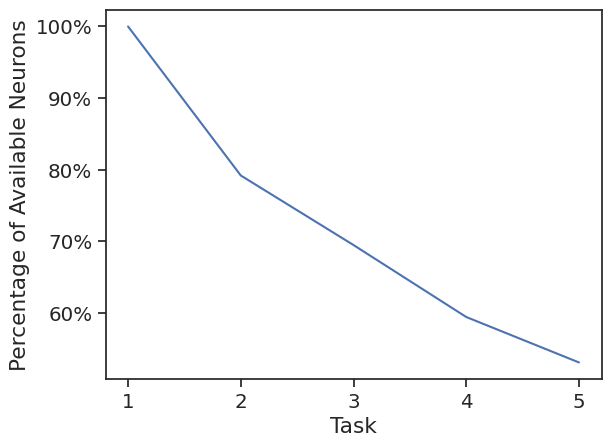

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
g = sns.lineplot( data_cifar,  x='Task', y='Percentage of Available Neurons', ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("frozen.pdf", format='pdf')

Dla Emnist to około 233, dla resnet 4803

In [59]:
path = 'results/emnist_rere_lrp_final_emnist'

In [60]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stderr-2025-01-25-12-33.txt',
 'stderr-2025-01-24-01-52.txt',
 'stderr-2025-01-27-05-19.txt',
 'args-2025-01-27-05-19.txt',
 'args-2025-01-25-12-33.txt',
 'stdout-2025-01-25-02-23.txt',
 'stdout-2025-01-23-13-17.txt',
 'raw_log-2025-01-26-18-46.txt',
 'args-2025-01-25-22-03.txt',
 'stdout-2025-01-25-22-03.txt',
 'args-2025-01-24-01-52.txt',
 'raw_log-2025-01-24-01-52.txt',
 'stdout-2025-01-27-05-19.txt',
 'args-2025-01-26-18-46.txt',
 'stderr-2025-01-24-14-05.txt',
 'args-2025-01-25-02-23.txt',
 'raw_log-2025-01-27-05-19.txt',
 'stdout-2025-01-26-08-17.txt',
 'raw_log-2025-01-25-02-23.txt',
 'raw_log-2025-01-25-22-03.txt',
 'args-2025-01-24-14-05.txt',
 'stdout-2025-01-24-14-05.txt',
 'stdout-2025-01-24-01-52.txt',
 'raw_log-2025-01-24-14-05.txt',
 'stderr-2025-01-26-08-17.txt',
 'stdout-2025-01-25-12-33.txt',
 'stderr-2025-01-23-13-17.txt',
 'args-2025-01-26-08-17.txt',
 'stderr-2025-01-26-18-46.txt',
 'stdout-2025-01-26-18-46.txt',
 'raw_log-2025-01-26-08-17.txt',
 'raw_log-2025-01

In [61]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-27-05-19.txt',
 'args-2025-01-25-12-33.txt',
 'args-2025-01-25-22-03.txt',
 'args-2025-01-24-01-52.txt',
 'args-2025-01-26-18-46.txt',
 'args-2025-01-25-02-23.txt',
 'args-2025-01-24-14-05.txt',
 'args-2025-01-26-08-17.txt',
 'args-2025-01-23-13-17.txt']

In [62]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-27-05-19.txt': {'acc_drop': 5.0,
  'approach': 'rere_lrp',
  'batch_size': 1024,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['emnist'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'final_emnist',
  'feature_selection_mean': True,
  'features_saved': 10.0,
  'fix_bn': True,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.01,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'LeNet',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 67,
  'num_tasks': 13,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositories/FACIL/re

In [63]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-26-18-46.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 0.6944377422332764},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 50.0},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 0.01},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 0.6910303831100464},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 50.9375},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-26-18-46',
   'value': 0.01},
  {'g

In [64]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [65]:
import pandas as pd
from itertools import chain
import numpy as np
data_emnist = pd.DataFrame({'Name': list(chain.from_iterable([["EMNIST" for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Percentage of Available Neurons': list(chain.from_iterable([[100*(233+i*2 - sum([j["value"] for j in res_dict[key] if "frozen" in j["name"] and j["task"] == i]))/(233+i*2) for i in range(13)] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()]))})

/tmp/ipykernel_30792/4002055198.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_emnist,  x='Task', y='Percentage of Available Neurons', ci=None)


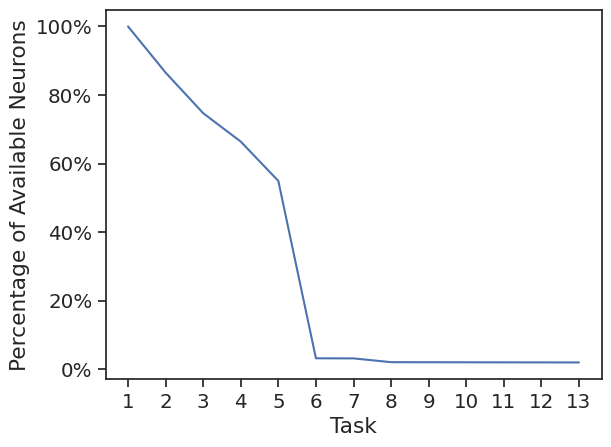

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_emnist,  x='Task', y='Percentage of Available Neurons', ci=None)
g.set_xticks(range(13))
g.set_xticklabels([i+1 for i in range(13)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("frozen_emnist.pdf", format='pdf', bbox_inches='tight')

In [67]:
path = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_rere_lrp_final_tiny_img'

In [68]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stderr-2025-01-27-03-56.txt',
 'stdout-2025-01-26-22-46.txt',
 'raw_log-2025-01-26-16-18.txt',
 'stderr-2025-01-26-16-18.txt',
 'stderr-2025-01-26-05-57.txt',
 'stderr-2025-01-25-23-46.txt',
 'stdout-2025-01-25-23-46.txt',
 'stderr-2025-01-25-23-47.txt',
 'raw_log-2025-01-25-23-46.txt',
 'stderr-2025-01-26-21-10.txt',
 'args-2025-01-26-13-51.txt',
 'args-2025-01-25-23-47.txt',
 'stdout-2025-01-27-03-56.txt',
 'raw_log-2025-01-25-23-47.txt',
 'raw_log-2025-01-26-13-51.txt',
 'stdout-2025-01-26-05-57.txt',
 'args-2025-01-26-05-57.txt',
 'stderr-2025-01-26-22-46.txt',
 'stdout-2025-01-26-13-51.txt',
 'args-2025-01-27-03-56.txt',
 'stdout-2025-01-26-16-18.txt',
 'args-2025-01-25-23-46.txt',
 'raw_log-2025-01-26-22-46.txt',
 'args-2025-01-26-16-18.txt',
 'raw_log-2025-01-26-21-10.txt',
 'stderr-2025-01-26-08-33.txt',
 'raw_log-2025-01-26-05-57.txt',
 'stderr-2025-01-26-13-51.txt',
 'args-2025-01-26-08-33.txt',
 'raw_log-2025-01-27-03-56.txt',
 'args-2025-01-26-22-46.txt',
 'stdout-2025-01

In [69]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-26-13-51.txt',
 'args-2025-01-25-23-47.txt',
 'args-2025-01-26-05-57.txt',
 'args-2025-01-27-03-56.txt',
 'args-2025-01-25-23-46.txt',
 'args-2025-01-26-16-18.txt',
 'args-2025-01-26-08-33.txt',
 'args-2025-01-26-22-46.txt',
 'args-2025-01-26-21-10.txt']

In [70]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-26-13-51.txt': {'acc_drop': 1.0,
  'approach': 'rere_lrp',
  'batch_size': 512,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['tiny-imagenet-200'],
  'eval_on_train': False,
  'exemplar_selection': 'random',
  'exp_name': 'final_tiny_img',
  'feature_selection_mean': True,
  'features_saved': 40,
  'fix_bn': True,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.01,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'resnet18',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 450,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositor

In [71]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-26-16-18.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 3.64214146232605},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 4.95},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 0.01},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 3.5592510356903078},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 7.6},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-26-16-18',
   'value': 0.01},
  {'group':

In [72]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)


In [73]:
import pandas as pd
from itertools import chain
import numpy as np
data_tiny = pd.DataFrame({'Name': list(chain.from_iterable([["Tiny ImageNet" for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Percentage of Available Neurons': list(chain.from_iterable([[100*(4803+i*20 - sum([j["value"] for j in res_dict[key] if "frozen" in j["name"] and j["task"] == i]))/(4803+i*20) for i in range(5)] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_30792/3297765101.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_tiny,  x='Task', y='Percentage of Available Neurons', ci=None)


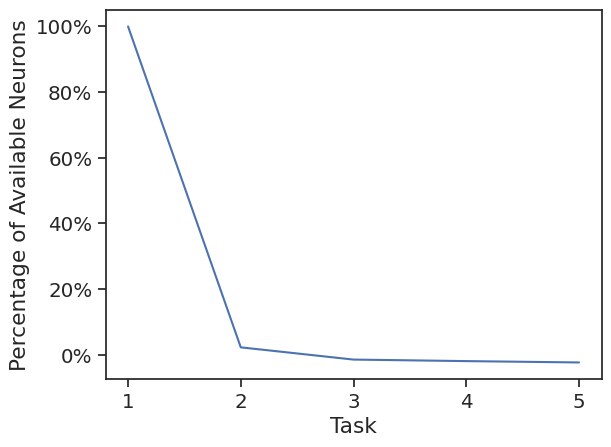

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.lineplot( data_tiny,  x='Task', y='Percentage of Available Neurons', ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("frozen_tiny.pdf", format='pdf')

In [75]:
path = '/home/karokaro/research-repositories/FACIL/results/svhn_rere_lrp_final_svhn'

In [76]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stdout-2025-01-21-20-30.txt',
 'args-2025-01-22-01-13.txt',
 'stderr-2025-01-23-02-52.txt',
 'stdout-2025-01-22-07-35.txt',
 'stderr-2025-01-22-11-27.txt',
 'raw_log-2025-01-22-23-05.txt',
 'stdout-2025-01-23-02-52.txt',
 'stderr-2025-01-22-23-05.txt',
 'args-2025-01-22-07-35.txt',
 'raw_log-2025-01-22-15-13.txt',
 'stdout-2025-01-22-01-13.txt',
 'stderr-2025-01-22-15-13.txt',
 'stdout-2025-01-22-15-13.txt',
 'stderr-2025-01-21-20-30.txt',
 'raw_log-2025-01-22-01-13.txt',
 'stdout-2025-01-22-04-51.txt',
 'stderr-2025-01-22-04-51.txt',
 'raw_log-2025-01-22-07-35.txt',
 'stderr-2025-01-22-18-57.txt',
 'stdout-2025-01-22-23-05.txt',
 'stdout-2025-01-21-20-29.txt',
 'stdout-2025-01-22-11-27.txt',
 'args-2025-01-22-18-57.txt',
 'args-2025-01-23-02-52.txt',
 'args-2025-01-22-23-05.txt',
 'args-2025-01-22-04-51.txt',
 'args-2025-01-22-15-13.txt',
 'stderr-2025-01-22-07-35.txt',
 'args-2025-01-22-11-27.txt',
 'stdout-2025-01-22-18-57.txt',
 'raw_log-2025-01-22-04-51.txt',
 'raw_log-2025-01-2

In [77]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-22-01-13.txt',
 'args-2025-01-22-07-35.txt',
 'args-2025-01-22-18-57.txt',
 'args-2025-01-23-02-52.txt',
 'args-2025-01-22-23-05.txt',
 'args-2025-01-22-04-51.txt',
 'args-2025-01-22-15-13.txt',
 'args-2025-01-22-11-27.txt']

In [78]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-22-01-13.txt': {'acc_drop': 5.0,
  'approach': 'rere_lrp',
  'batch_size': 512,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['svhn'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'final_svhn',
  'feature_selection_mean': True,
  'features_saved': 40,
  'fix_bn': True,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.1,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'resnet18',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 153,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositories/FACIL/results

In [79]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-22-23-05.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 0.4434686629918584},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 77.61828814460394},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 0.01},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 0.3347140240390398},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 84.84848484848484},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-22-23-05',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-22-23-05',
 

In [80]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [81]:
import pandas as pd
from itertools import chain
import numpy as np
data_svhn = pd.DataFrame({'Name': list(chain.from_iterable([["SVHN" for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Percentage of Available Neurons': list(chain.from_iterable([[100*(4803+i*2 - sum([j["value"] for j in res_dict[key] if "frozen" in j["name"] and j["task"] == i]))/(4803+i*2) for i in range(5)] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_30792/2836951489.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_svhn,  x='Task', y='Percentage of Available Neurons', ci=None)


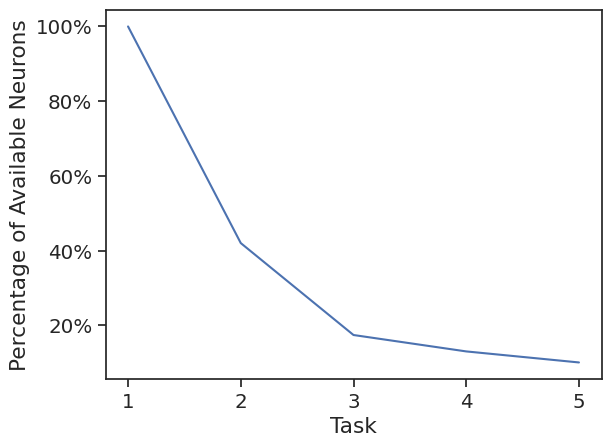

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.lineplot( data_svhn,  x='Task', y='Percentage of Available Neurons', ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("frozen_svhn.pdf", format='pdf')

In [83]:
path = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_rere_lrp_final_fashionmnist'

In [84]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['raw_log-2025-01-22-18-29.txt',
 'raw_log-2025-01-22-09-27.txt',
 'stdout-2025-01-22-20-13.txt',
 'args-2025-01-22-21-59.txt',
 'stderr-2025-01-22-17-06.txt',
 'stdout-2025-01-22-12-27.txt',
 'stderr-2025-01-22-21-59.txt',
 'stdout-2025-01-22-21-59.txt',
 'stdout-2025-01-22-11-01.txt',
 'raw_log-2025-01-22-11-01.txt',
 'stdout-2025-01-22-18-29.txt',
 'stderr-2025-01-22-11-01.txt',
 'raw_log-2025-01-22-15-33.txt',
 'args-2025-01-22-17-06.txt',
 'stderr-2025-01-22-13-58.txt',
 'stderr-2025-01-22-20-13.txt',
 'raw_log-2025-01-22-13-58.txt',
 'stdout-2025-01-22-17-06.txt',
 'stdout-2025-01-22-09-27.txt',
 'args-2025-01-22-15-33.txt',
 'stderr-2025-01-22-15-33.txt',
 'args-2025-01-22-11-01.txt',
 'args-2025-01-22-09-27.txt',
 'stdout-2025-01-22-15-33.txt',
 'raw_log-2025-01-22-12-27.txt',
 'stderr-2025-01-22-09-27.txt',
 'args-2025-01-22-12-27.txt',
 'raw_log-2025-01-22-21-59.txt',
 'args-2025-01-22-20-13.txt',
 'args-2025-01-22-18-29.txt',
 'stderr-2025-01-22-18-29.txt',
 'raw_log-2025-01

In [85]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-22-21-59.txt',
 'args-2025-01-22-17-06.txt',
 'args-2025-01-22-15-33.txt',
 'args-2025-01-22-11-01.txt',
 'args-2025-01-22-09-27.txt',
 'args-2025-01-22-12-27.txt',
 'args-2025-01-22-20-13.txt',
 'args-2025-01-22-18-29.txt',
 'args-2025-01-22-13-58.txt']

In [86]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-22-21-59.txt': {'acc_drop': 15.0,
  'approach': 'rere_lrp',
  'batch_size': 1024,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['fashionmnist'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'final_fashionmnist',
  'feature_selection_mean': True,
  'features_saved': 10.0,
  'fix_bn': False,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.01,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'LeNet',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 156,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-reposit

In [87]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-22-18-29.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 0.6939966726303101},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 50.0},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 0.01},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 0.6936221027374267},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 50.0},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-22-18-29',
   'value': 0.01},
  {'grou

In [88]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [89]:
import pandas as pd
from itertools import chain
import numpy as np
data_fashion = pd.DataFrame({'Name': list(chain.from_iterable([["FashionMNIST"for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Percentage of Available Neurons': list(chain.from_iterable([[100*(233+i*2 - sum([j["value"] for j in res_dict[key] if "frozen" in j["name"] and j["task"] == i]))/(233+i*2) for i in range(5)] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_30792/1128092917.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_fashion,  x='Task', y='Percentage of Available Neurons', ci=None)


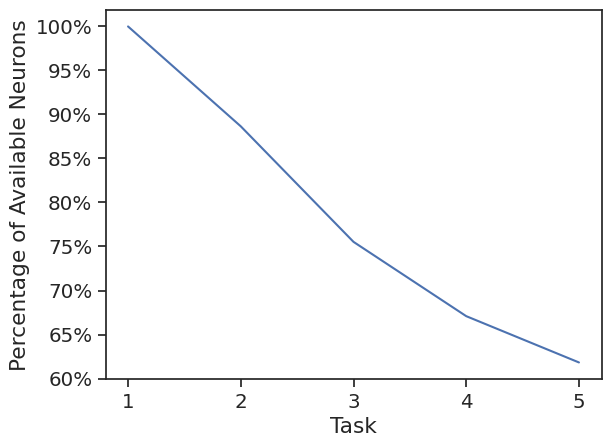

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.lineplot( data_fashion,  x='Task', y='Percentage of Available Neurons', ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
g.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.savefig("frozen_fashion.pdf", format='pdf')

In [91]:
path = '/home/karokaro/research-repositories/FACIL/results/cifar100_rere_lrp_final_cifar'

In [92]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['raw_log-2025-01-09-02-42.txt',
 'args-2025-01-10-18-33.txt',
 'stderr-2025-01-08-19-37.txt',
 'raw_log-2025-01-10-02-42.txt',
 'args-2025-01-11-03-08.txt',
 'raw_log-2025-01-10-10-44.txt',
 'stdout-2025-01-08-11-47.txt',
 'stderr-2025-01-08-11-47.txt',
 'raw_log-2025-01-09-10-49.txt',
 'raw_log-2025-01-08-11-47.txt',
 'stdout-2025-01-09-02-42.txt',
 'stdout-2025-01-10-10-44.txt',
 'args-2025-01-09-02-42.txt',
 'stderr-2025-01-09-18-08.txt',
 'args-2025-01-10-02-42.txt',
 'raw_log-2025-01-11-03-08.txt',
 'stdout-2025-01-09-18-08.txt',
 'stdout-2025-01-10-18-33.txt',
 'args-2025-01-08-19-37.txt',
 'args-2025-01-09-10-49.txt',
 'stderr-2025-01-10-10-44.txt',
 'stdout-2025-01-09-10-49.txt',
 'stderr-2025-01-09-02-42.txt',
 'stderr-2025-01-11-03-08.txt',
 'stdout-2025-01-10-02-42.txt',
 'stderr-2025-01-09-10-49.txt',
 'raw_log-2025-01-10-18-33.txt',
 'raw_log-2025-01-08-19-37.txt',
 'stderr-2025-01-10-02-42.txt',
 'stderr-2025-01-10-18-33.txt',
 'raw_log-2025-01-09-18-08.txt',
 'args-2025

In [93]:
args = [file for file in onlyfiles if 'args' in file ]
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [94]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [95]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [9]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [96]:
import pandas as pd
from itertools import chain
import numpy as np
data_cifar100 = pd.DataFrame({'Name': list(chain.from_iterable([["CIFAR-100" for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Percentage of Available Neurons': list(chain.from_iterable([[100*(10947+i*10 - sum([j["value"] for j in res_dict[key] if "frozen" in j["name"] and j["task"] == i]))/(10947+i*10) for i in range(10)] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(10)] for key in res_dict.keys()]))})

/tmp/ipykernel_30792/101726649.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_cifar100,  x='Task', y='Percentage of Available Neurons', ci=None)


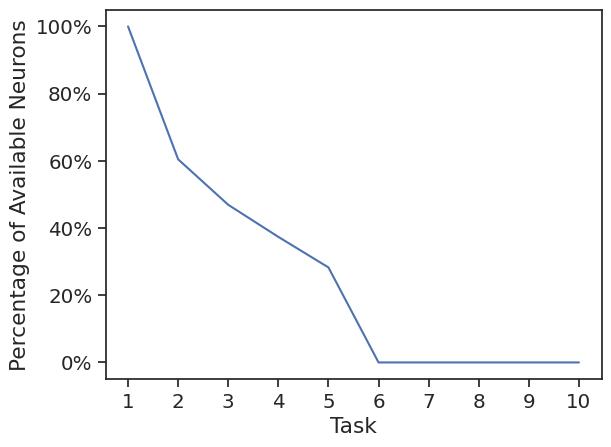

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_cifar100,  x='Task', y='Percentage of Available Neurons', ci=None)
g.set_xticks(range(10))
g.set_xticklabels([i+1 for i in range(10)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("frozen_cifar100.pdf", format='pdf', bbox_inches='tight')

In [98]:
data_all = pd.concat([data_cifar, data_fashion, data_svhn, data_tiny], ignore_index=True)

/tmp/ipykernel_30792/1124702270.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Name', x='Task', y='Percentage of Available Neurons', hue_order=hue_order, ci=None)


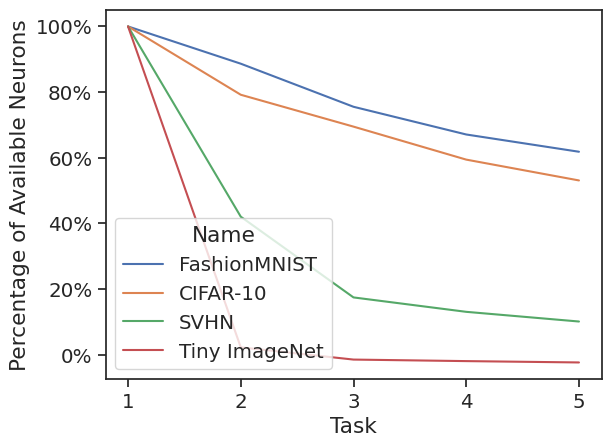

In [99]:
import matplotlib.pyplot as plt
hue_order = ["FashionMNIST", "CIFAR-10", "SVHN", "Tiny ImageNet"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Name', x='Task', y='Percentage of Available Neurons', hue_order=hue_order, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("comparison_pruned.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_30792/57675666.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Name', x='Task', y='Accuracy', hue_order=hue_order, ci=None)


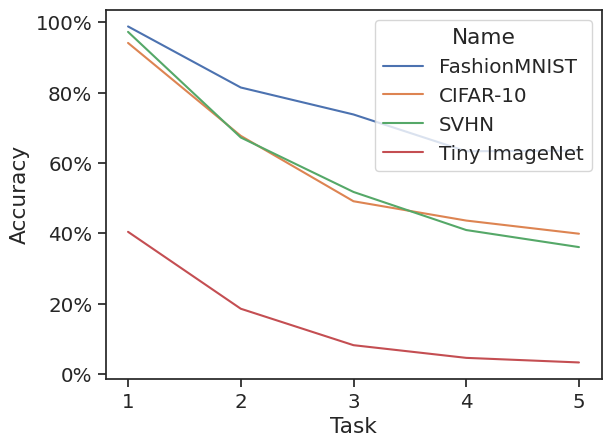

In [100]:
import matplotlib.pyplot as plt
hue_order = ["FashionMNIST", "CIFAR-10", "SVHN", "Tiny ImageNet"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Name', x='Task', y='Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("comparison_pruned_acc.pdf", format='pdf', bbox_inches='tight')